---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

## Linear Regression

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Make a simple linear regression model to see what testing error arises
random.seed(5000)
df = pd.read_csv('../../data/processed-data/dc_bike_routes.csv')

# Split features and target
Y = df['sentiment']
X = df.iloc[:, 2:12]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
test_error = mean_squared_error(y_test, y_pred) #Testing Error
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Mean Squared Error:", test_error)
print("R² Score:", r2)


Mean Squared Error: 0.13784056412573972
R² Score: 0.029290998492904396


## Regression Tree

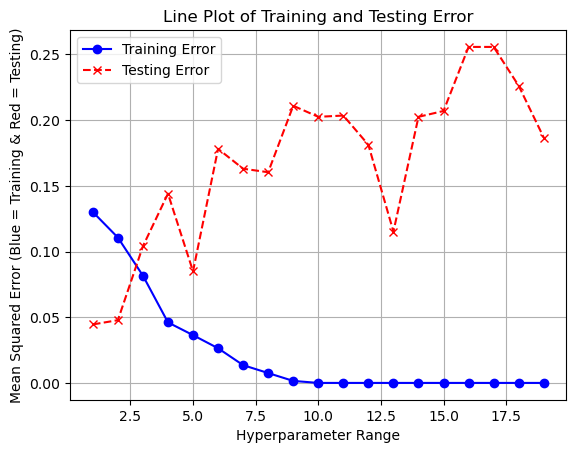

In [2]:
## Make a Regression Tree that predicts the sentiment of a bike path given mileage and other binary variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
y_train = y_train
y_test = y_test

hyper_parameters = []
train_error = []
test_error = []

# Optimize Hyperparameter
for value in range(1,20):

    model = DecisionTreeRegressor(max_depth = value)

    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    train_error_sample = mean_squared_error(y_train, yp_train)
    test_error_sample = mean_squared_error(y_test, yp_test)

    hyper_parameters.append(value)
    train_error.append(train_error_sample)
    test_error.append(test_error_sample)

# Plot the data
plt.plot(hyper_parameters, train_error, label="Training Error", color="blue", linestyle="-", marker="o")
plt.plot(hyper_parameters, test_error, label="Testing Error", color="red", linestyle="--", marker="x")

# Add labels and title
plt.xlabel("Hyperparameter Range")
plt.ylabel("Mean Squared Error (Blue = Training & Red = Testing)")
plt.title("Line Plot of Training and Testing Error")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [3]:
# Make the best model and output the errors
model_best = DecisionTreeRegressor(max_depth = 2)

model_best.fit(x_train, y_train)

yp_train = model_best.predict(x_train)
yp_test = model_best.predict(x_test)

train_error_best = mean_squared_error(y_train, yp_train)
test_error_best = mean_squared_error(y_test, yp_test)

print("Training Error:", train_error_best)
print("Testing Error:", test_error_best)

Training Error: 0.11066305675070026
Testing Error: 0.047755677369614516


## Classification Trees

In [4]:
# Functions for displaying accuracy and the model

# Confusion Plot to visualize accuracy of the model later on
def confusion_plot(y_data, y_pred):
    # Calculate and print accuracy
    accuracy = accuracy_score(y_data, y_pred)
    print("ACCURACY:", accuracy)

    if len(y_data.unique()) == 2:
        neg_recall = recall_score(y_data == 0, (y_pred == 0))
        neg_precision = precision_score((y_data) == 0, (y_pred == 0))
        pos_recall = recall_score((y_data) == 1, (y_pred == 1))
        pos_precision = precision_score((y_data) == 1, (y_pred == 1))

        print("NEGATIVE RECALL (Y=0):", neg_recall)
        print("NEGATIVE PRECISION (Y=0):", neg_precision)
        print("POSITIVE RECALL (Y=1):", pos_recall)
        print("POSITIVE PRECISION (Y=1):", pos_precision)

    conf_matrix = confusion_matrix(y_data, y_pred)
    print(conf_matrix)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()

# Display a tree
def display_tree(model,X,Y):
    fig = plt.figure(figsize=(25,20))
    plot_tree(model,
                feature_names=X.columns,
                class_names=[str(c) for c in Y.unique()],
                filled=True)

    plt.show()

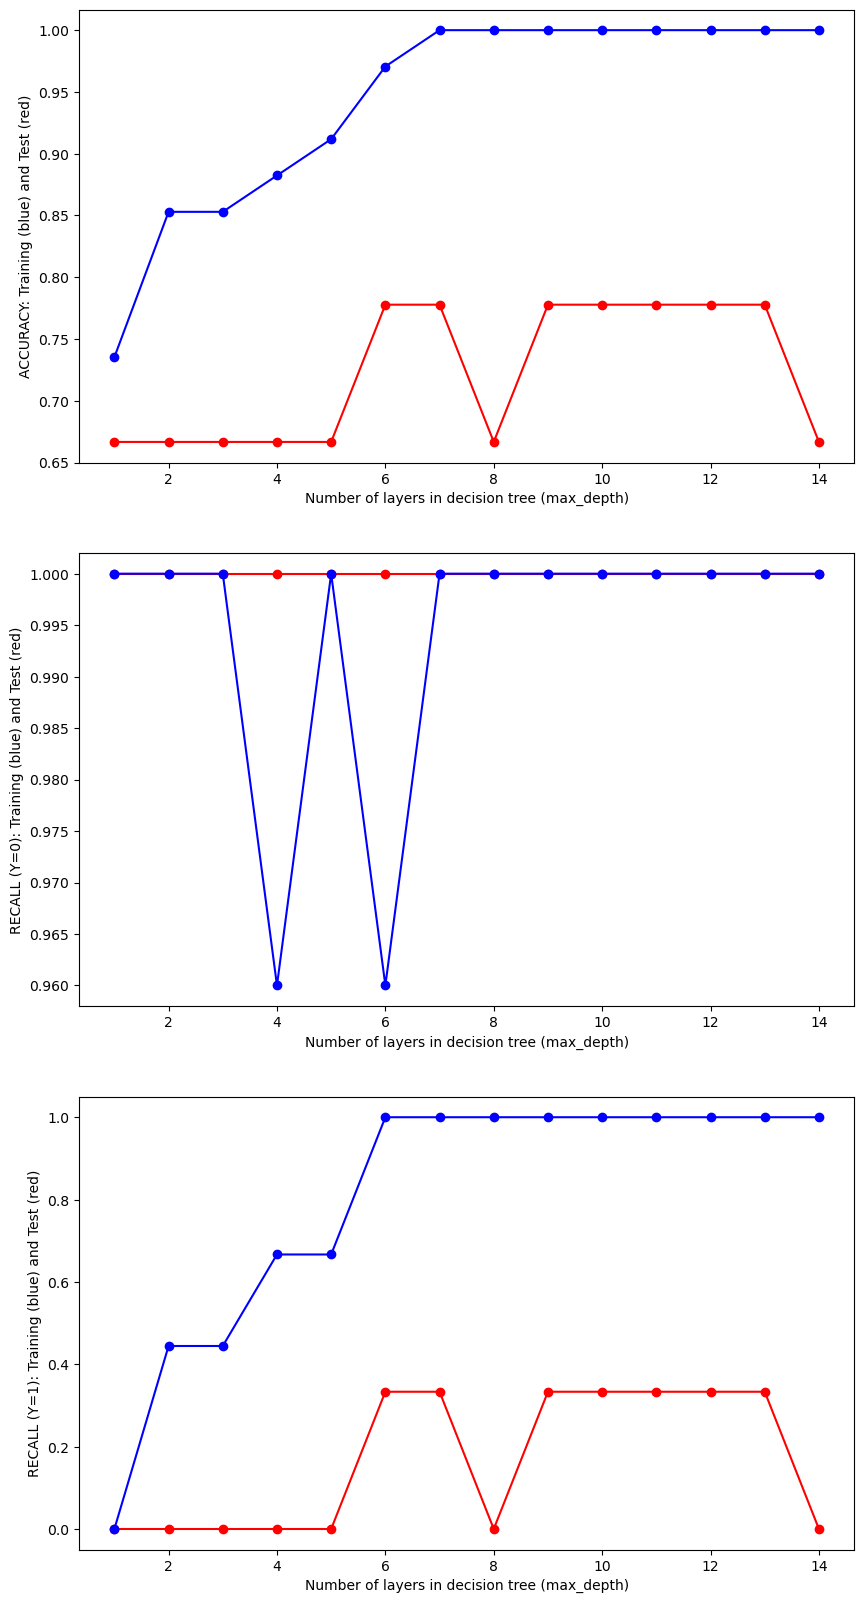

In [5]:
# Try to predict loop based on other variables. FIrst, let's optimize the hyper parameters
Y_class_bin = df['loop']
X_class_bin = pd.concat([df.iloc[:, 2:11], df['sentiment']], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X_class_bin, Y_class_bin, test_size = 0.2, random_state = 0)

test_results=[]
train_results=[]

for num_layer in range(1,15):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

axes[0].plot(range(1,15),[result[1] for result in test_results],'-or')
axes[0].plot(range(1,15),[result[1] for result in train_results],'-ob')
axes[0].set_xlabel('Number of layers in decision tree (max_depth)')
axes[0].set_ylabel('ACCURACY: Training (blue) and Test (red)')

axes[1].plot(range(1,15),[result[2] for result in test_results],'-or')
axes[1].plot(range(1,15),[result[2] for result in train_results],'-ob')
axes[1].set_xlabel('Number of layers in decision tree (max_depth)')
axes[1].set_ylabel('RECALL (Y=0): Training (blue) and Test (red)')

axes[2].plot(range(1,15),[result[3] for result in test_results],'-or')
axes[2].plot(range(1,15),[result[3] for result in train_results],'-ob')
axes[2].set_xlabel('Number of layers in decision tree (max_depth)')
axes[2].set_ylabel('RECALL (Y=1): Training (blue) and Test (red)')

# Show the plots
plt.show()

------TRAINING------
ACCURACY: 1.0
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[25  0]
 [ 0  9]]


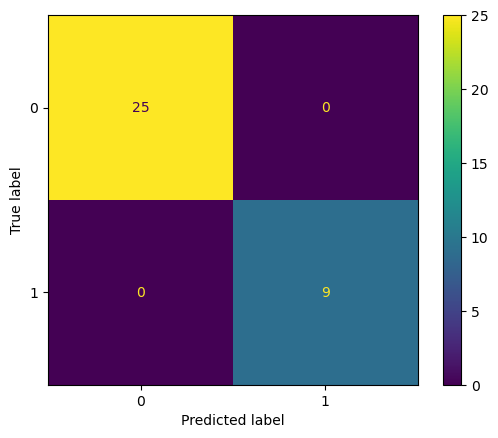

------TEST------
ACCURACY: 0.6666666666666666
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 0.6666666666666666
POSITIVE RECALL (Y=1): 0.0
POSITIVE PRECISION (Y=1): 0.0
[[6 0]
 [3 0]]


/home/gentry/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


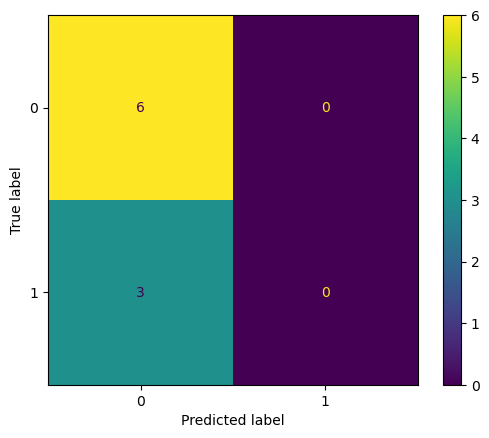

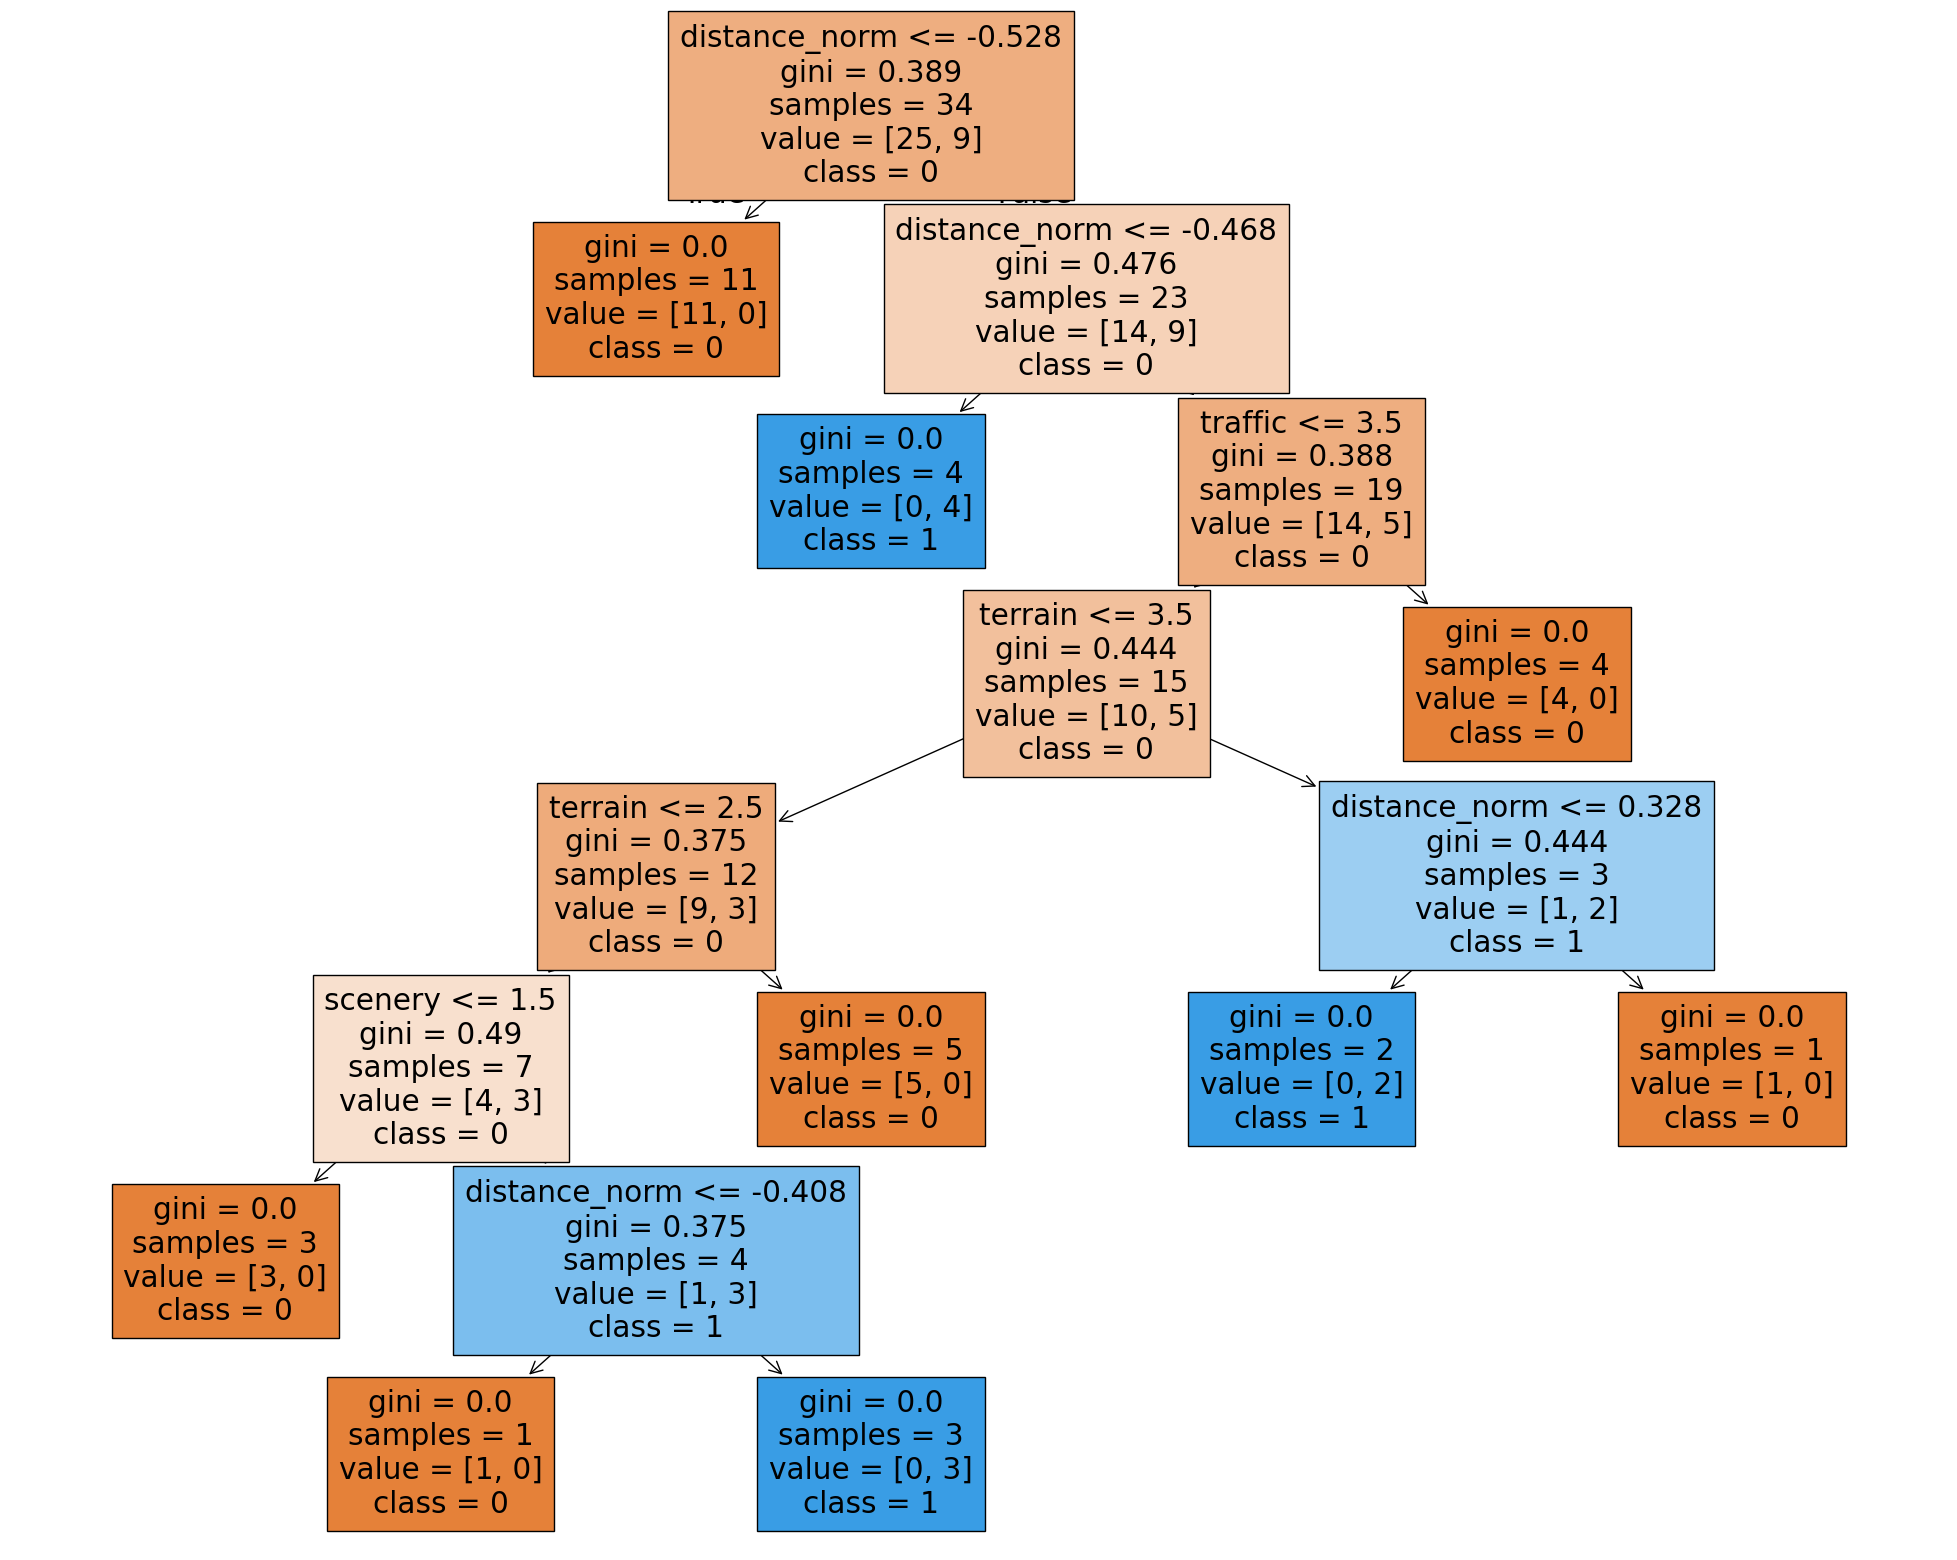

In [6]:
# Build the optimal model and display the confusion matrix to show accuracy. Display the tree
model_best = DecisionTreeClassifier(max_depth = 7)
model_best = model_best.fit(x_train, y_train)
yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

display_tree(model_best, X_class_bin, Y_class_bin)

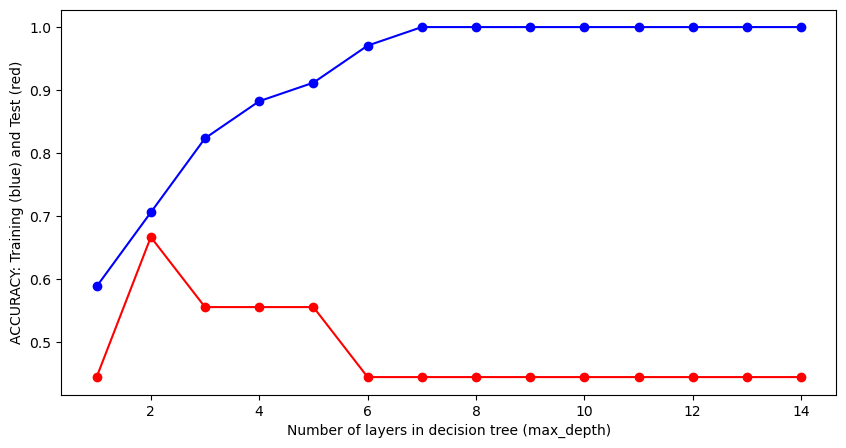

In [7]:
# Now let's build a classification tree to try and predict the state in which a bike trail starts in given all numerical/binary features
Y_class = df['state1']
X_class = df.iloc[:, 2:13]

x_train, x_test, y_train, y_test = train_test_split(X_class, Y_class, test_size = 0.2, random_state = 0)

test_results=[]
train_results=[]

for num_layer in range(1,15):
    model = DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    test_results.append([num_layer,accuracy_score(y_test, yp_test)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train)])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.plot(range(1,15),[result[1] for result in test_results],'-or')
axes.plot(range(1,15),[result[1] for result in train_results],'-ob')
axes.set_xlabel('Number of layers in decision tree (max_depth)')
axes.set_ylabel('ACCURACY: Training (blue) and Test (red)')
# Show the plots
plt.show()

------TRAINING------
ACCURACY: 1.0
[[10  0  0  0]
 [ 0 18  0  0]
 [ 0  0  1  0]
 [ 0  0  0  5]]


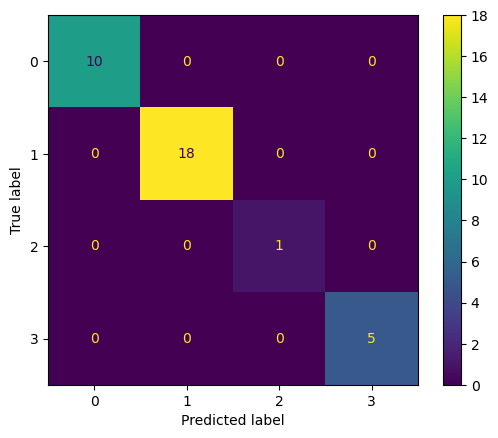

------TEST------
ACCURACY: 0.4444444444444444
[[0 1 0 0]
 [2 4 1 0]
 [0 0 0 0]
 [0 1 0 0]]


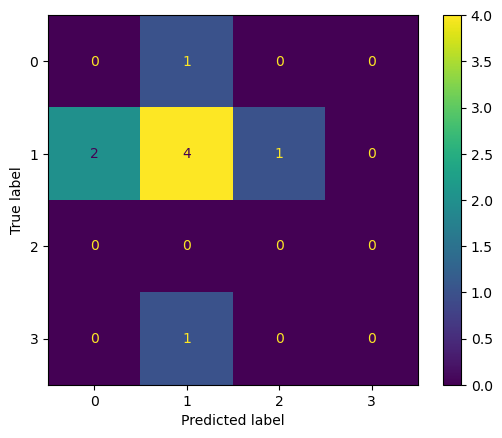

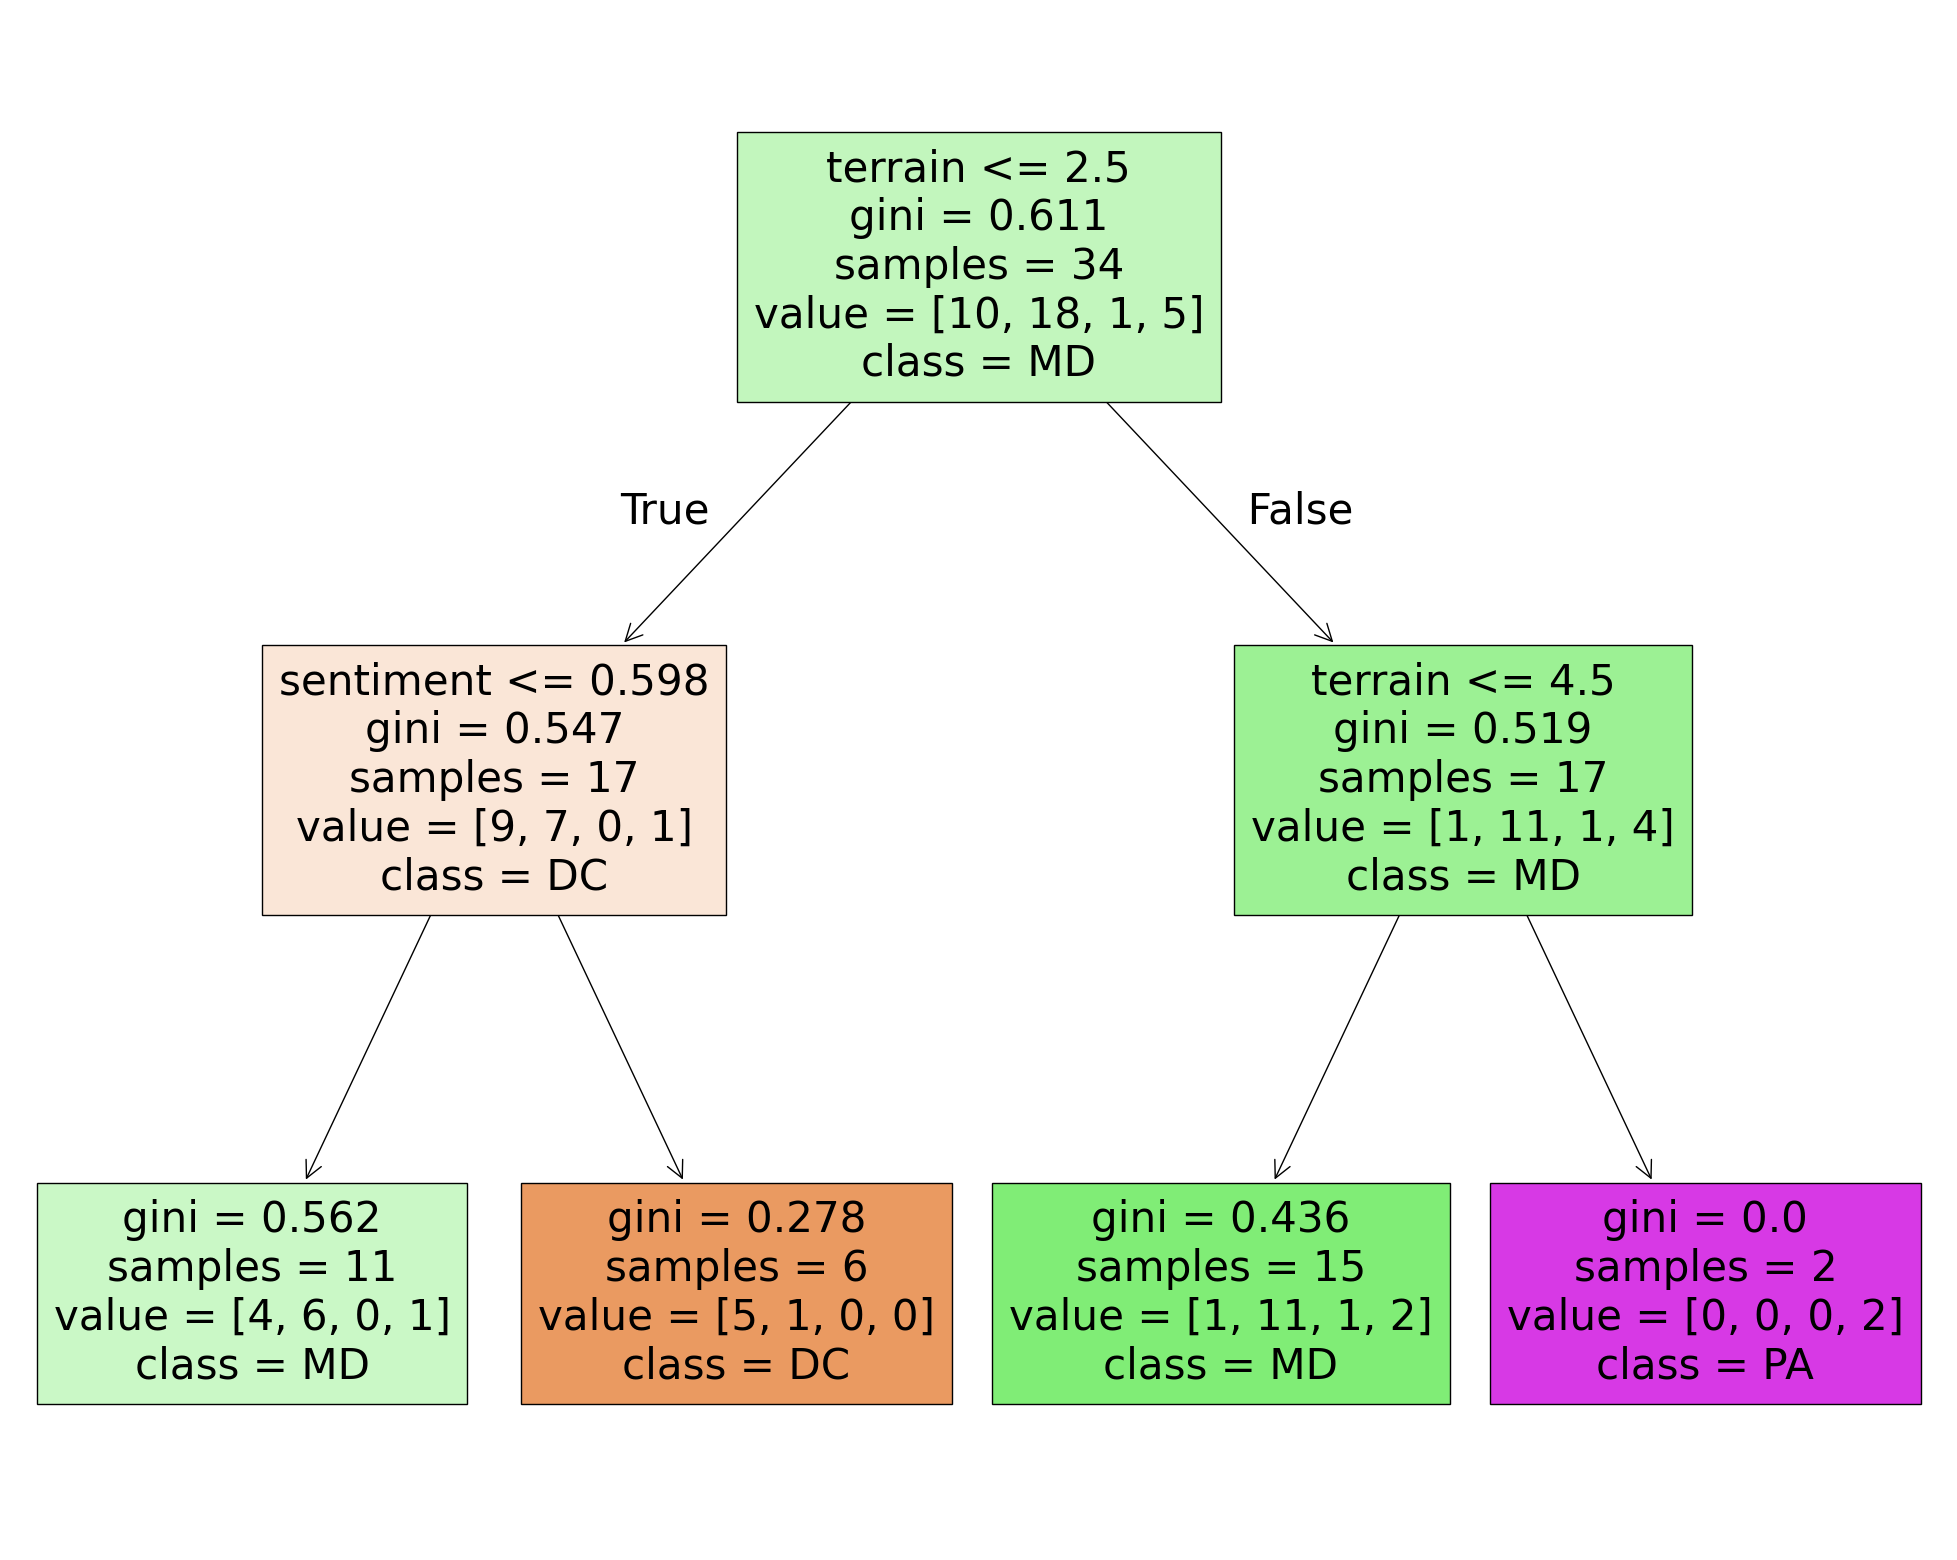

In [8]:
# Build the optimal model and display the confusion matrix to show accuracy. Display the tree
model_best = DecisionTreeClassifier(max_depth = 2)
model_best = model_best.fit(x_train, y_train)
yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

display_tree(model_best, X_class, Y_class)